In [1]:
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

# Load data from AWS Speedtest - Global

In [2]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url



In [3]:
tile_url = get_tile_url("fixed", 2020, 4)
tile_url

# Noted Q3 data available 1 July 2020, 
# Noted Q4 data available 20 Jan 2021

'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2020/quarter%3D4/2020-10-01_performance_fixed_tiles.zip'

In [4]:
print (datetime.now())

2021-01-20 10:13:43.406407


In [5]:
tiles = gp.read_file(tile_url)
# load times - 30 mins (Sun pm), 8 mins (Mon am),  8 mins (Tues am)
# 20/1/21 Monash  WED AM, 5MINS

In [6]:
print (datetime.now())

2021-01-20 10:19:33.546299


## Check data, extract AUS subset .cx, HIGH. level descriptions.

In [7]:
len(tiles)

6304987

In [11]:
au_tiles.devices.sum()

477643

In [10]:
tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,1233013313200301,43426,44856,4,915,163,"POLYGON ((78.42590 17.45547, 78.43140 17.45547..."
1,0302231031021131,34684,1667,602,2,1,"POLYGON ((-80.42542 44.52001, -80.41992 44.520..."
2,0302322122312111,78753,33569,13,3,2,"POLYGON ((-77.04163 42.13082, -77.03613 42.130..."
3,0231121211030100,397666,290737,7,21,8,"POLYGON ((-97.27295 35.38905, -97.26746 35.389..."
4,2103213003001301,81641,42419,9,57,11,"POLYGON ((-58.63953 -34.61513, -58.63403 -34.6..."
5,0320200301002332,64071,17230,20,3,1,"POLYGON ((-88.20923 30.68044, -88.20374 30.680..."
6,1233003111203211,47232,37820,7,3264,432,"POLYGON ((72.83386 19.08288, 72.83936 19.08288..."
7,0313112131323312,44440,16387,23,111,21,"POLYGON ((-2.91138 53.55010, -2.90588 53.55010..."
8,1321133031310212,36355,50904,29,1,1,"POLYGON ((133.51685 33.55513, 133.52234 33.555..."
9,0313131310301221,58704,15805,12,50,14,"POLYGON ((-0.47791 51.48822, -0.47241 51.48822..."


In [8]:
au_tiles = tiles.cx[113.338953:153.569469 ,	-43.634597:-10.668186]
len(au_tiles)
# processing World data to Australia subset by bounding box
# source of Bounding Box - World data set
# processing time - 5 mins

76586

In [9]:
au_tiles.sum()

quadkey       3103201003232212311223130010113031121322303220...
avg_d_kbps                                           3179087202
avg_u_kbps                                           1066654969
avg_lat_ms                                              3089330
tests                                                   1509176
devices                                                  477643
dtype: object

In [16]:
# au_tiles.sort_values('devices',ascending=False).head(50)
#.mean()
# Top50, 100 of Most Devices average speed 50Mbps.

In [9]:
print (datetime.now())

2020-12-13 17:56:21.440310


In [8]:
len(au_tiles)

88654

# Create centroids, lat long for Google map plotting

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


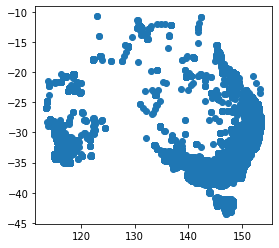

In [8]:
au_tiles.centroid.plot()

In [9]:
au_tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,3112301322111002,38735,19398,7,352,38,"POLYGON ((150.77637 -34.02079, 150.78186 -34.0..."
1,3112320211131223,38934,11800,22,12,7,"POLYGON ((147.61780 -37.81846, 147.62329 -37.8..."
2,3130100233020201,54617,18212,25,63,27,"POLYGON ((147.31018 -42.89206, 147.31567 -42.8..."
3,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9..."
4,3112301330200101,47832,23213,10,425,130,"POLYGON ((151.19934 -33.87042, 151.20483 -33.8..."
5,3112302212220023,27534,2518,40,46,5,"POLYGON ((146.95862 -35.97356, 146.96411 -35.9..."
6,3112231312213112,2620,4037,627,1,1,"POLYGON ((145.71167 -38.17343, 145.71716 -38.1..."
7,3103023223323312,36295,17877,6,146,25,"POLYGON ((115.91675 -31.93818, 115.92224 -31.9..."
8,3112130032010010,25137,12254,11,3,2,"POLYGON ((152.67700 -27.99440, 152.68250 -27.9..."
9,3112301321103013,40824,12780,12,137,45,"POLYGON ((151.05652 -33.76545, 151.06201 -33.7..."


In [10]:
au_tiles.centroid

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0        POINT (150.77911 -34.02307)
1        POINT (147.62054 -37.82063)
2        POINT (147.31293 -42.89408)
3        POINT (144.78607 -37.91603)
4        POINT (151.20209 -33.87270)
                    ...             
88649    POINT (152.99835 -25.99014)
88650    POINT (144.35211 -36.77629)
88651    POINT (146.33514 -34.51787)
88652    POINT (131.48163 -26.00989)
88653    POINT (152.94342 -27.06157)
Length: 88654, dtype: geometry

In [71]:
au_tiles['location'] = au_tiles.centroid

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [12]:
au_tiles.location

0        POINT (150.77911 -34.02307)
1        POINT (147.62054 -37.82063)
2        POINT (147.31293 -42.89408)
3        POINT (144.78607 -37.91603)
4        POINT (151.20209 -33.87270)
                    ...             
88649    POINT (152.99835 -25.99014)
88650    POINT (144.35211 -36.77629)
88651    POINT (146.33514 -34.51787)
88652    POINT (131.48163 -26.00989)
88653    POINT (152.94342 -27.06157)
Name: location, Length: 88654, dtype: geometry

In [15]:
lat = au_tiles.location.x
lat

0        150.779114
1        147.620544
2        147.312927
3        144.786072
4        151.202087
            ...    
88649    152.998352
88650    144.352112
88651    146.335144
88652    131.481628
88653    152.943420
Length: 88654, dtype: float64

In [72]:
au_tiles['long'] = au_tiles.location.x

In [73]:
au_tiles['lat'] = au_tiles.location.y

In [117]:
au_tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112301322111002,38735,19398,7,352,38,"POLYGON ((150.77637 -34.02079, 150.78186 -34.0...",0.001,19.398
1,3112320211131223,38934,11800,22,12,7,"POLYGON ((147.61780 -37.81846, 147.62329 -37.8...",0.003,11.800
2,3130100233020201,54617,18212,25,63,27,"POLYGON ((147.31018 -42.89206, 147.31567 -42.8...",0.003,18.212
3,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9...",0.005,2.015
4,3112301330200101,47832,23213,10,425,130,"POLYGON ((151.19934 -33.87042, 151.20483 -33.8...",0.005,23.213
5,3112302212220023,27534,2518,40,46,5,"POLYGON ((146.95862 -35.97356, 146.96411 -35.9...",0.006,2.518
6,3112231312213112,2620,4037,627,1,1,"POLYGON ((145.71167 -38.17343, 145.71716 -38.1...",0.007,4.037
7,3103023223323312,36295,17877,6,146,25,"POLYGON ((115.91675 -31.93818, 115.92224 -31.9...",0.009,17.877
8,3112130032010010,25137,12254,11,3,2,"POLYGON ((152.67700 -27.99440, 152.68250 -27.9...",0.011,12.254
9,3112301321103013,40824,12780,12,137,45,"POLYGON ((151.05652 -33.76545, 151.06201 -33.7...",0.012,12.780


## Write AUS to csv for Google Maps 

In [23]:
au_tiles.to_csv('speedtest-AUS-2020-04-01')
# csv need converting to read back to geopandas - use geojson instead

In [28]:
au_tiles.sum()

quadkey       3112301322111002311232021113122331301002330202...
avg_d_kbps                                           2987877924
avg_u_kbps                                           1086985870
avg_lat_ms                                              3816636
tests                                                   3073738
devices                                                  761727
long                                                1.28287e+07
lat                                                -2.92914e+06
dtype: object

In [29]:
au_tiles.mean()

quadkey                inf
avg_d_kbps    3.370269e+04
avg_u_kbps    1.226099e+04
avg_lat_ms    4.305092e+01
tests         3.467117e+01
devices       8.592133e+00
long          1.447052e+02
lat          -3.304017e+01
dtype: float64

In [9]:
au_tiles.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,avg_d_mbps,avg_u_mbps
count,88654.000000,88654.000000,88654.000000,88654.000000,88654.000000,88654.000000,88654.000000
mean,33702.685993,12260.990705,43.050917,34.671171,8.592133,33.702686,12.260991
std,21166.131499,10737.826269,114.212889,73.832828,14.253466,21.166131,10.737826
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,0.001000
25%,20720.000000,4248.250000,11.000000,2.000000,1.000000,20.720000,4.248250
50%,33496.500000,12461.000000,17.000000,8.000000,3.000000,33.496500,12.461000
75%,43871.500000,17478.000000,32.000000,37.000000,11.000000,43.871500,17.478000
max,724326.000000,521442.000000,5751.000000,7339.000000,504.000000,724.326000,521.442000


## Plot dload speed

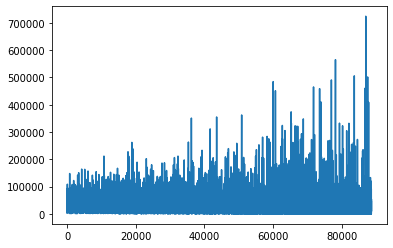

In [118]:
au_tiles.avg_d_kbps.plot()

In [121]:
dload = au_tiles.avg_d_mbps
dload
#au_tiles all sorted, so array index is in ascending order

0          0.001
1          0.003
2          0.003
3          0.005
4          0.005
          ...   
88649    490.861
88650    501.795
88651    505.843
88652    565.112
88653    724.326
Name: avg_d_mbps, Length: 88654, dtype: float64

In [107]:
dload.sort_values()

0          0.001
1          0.003
2          0.003
3          0.005
4          0.005
          ...   
88649    490.861
88650    501.795
88651    505.843
88652    565.112
88653    724.326
Name: avg_d_mbps, Length: 88654, dtype: float64

In [113]:

dl2=melb.avg_d_mbps
dl2

3          0.005
6          0.007
10         0.012
15         0.021
18         0.025
          ...   
88604    254.860
88615    271.821
88618    273.389
88623    284.033
88632    322.952
Name: avg_d_mbps, Length: 16508, dtype: float64

In [116]:
dl2.tail(50)

88204    114.703
88208    115.261
88219    116.139
88229    116.849
88239    117.891
88245    118.631
88246    118.955
88250    119.338
88270    122.060
88273    122.363
88285    123.450
88290    124.256
88295    124.568
88296    124.614
88297    124.768
88307    125.939
88310    126.472
88318    127.530
88319    127.648
88326    129.453
88330    130.053
88349    133.081
88371    136.093
88381    137.982
88392    140.753
88398    141.892
88447    152.478
88454    153.655
88460    156.249
88473    161.661
88477    163.929
88478    163.971
88491    167.989
88493    168.945
88498    172.158
88499    172.390
88500    172.533
88506    176.490
88508    178.186
88528    189.399
88545    201.554
88547    202.081
88551    203.653
88589    233.130
88597    239.292
88604    254.860
88615    271.821
88618    273.389
88623    284.033
88632    322.952
Name: avg_d_mbps, dtype: float64

<bound method Axes.hist of <matplotlib.axes._subplots.AxesSubplot object at 0x7f8168f709e8>>

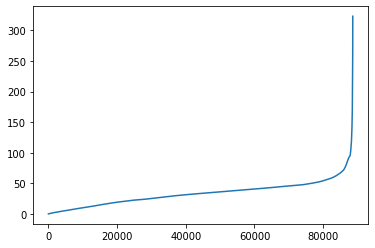

In [123]:
dl2.plot().hist

In [108]:
dload

0          0.001
1          0.003
2          0.003
3          0.005
4          0.005
          ...   
88649    490.861
88650    501.795
88651    505.843
88652    565.112
88653    724.326
Name: avg_d_mbps, Length: 88654, dtype: float64

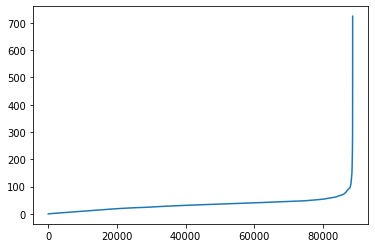

In [120]:
dload.plot()


In [33]:
au_tiles.sort_values('avg_d_kbps')

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
6546095,3112130003103132,1,724,32,1,1,"POLYGON ((152.47925 -27.42541, 152.48474 -27.4...",POINT (152.48199 -27.42785),152.481995,-27.427852
3660285,3112130302221320,3,640,48,1,1,"POLYGON ((153.34717 -28.87354, 153.35266 -28.8...",POINT (153.34991 -28.87594),153.349915,-28.875945
4268980,3112132013323213,3,1314,1258,1,1,"POLYGON ((153.16589 -30.13088, 153.17139 -30.1...",POINT (153.16864 -30.13325),153.168640,-30.133251
2931824,3112301200231320,5,1648,48,1,1,"POLYGON ((149.21631 -33.38559, 149.22180 -33.3...",POINT (149.21906 -33.38788),149.219055,-33.387880
4140173,3130100233003032,5,4665,5,1,1,"POLYGON ((147.35962 -42.85583, 147.36511 -42.8...",POINT (147.36237 -42.85785),147.362366,-42.857846
...,...,...,...,...,...,...,...,...,...,...
4746167,3112203021333302,490861,40212,6,2,1,"POLYGON ((138.49365 -35.16034, 138.49915 -35.1...",POINT (138.49640 -35.16258),138.496399,-35.162582
6743211,3110322313311220,501795,9195,13,1,1,"POLYGON ((149.01855 -21.15624, 149.02405 -21.1...",POINT (149.02130 -21.15880),149.021301,-21.158800
6055041,3112203210023120,505843,43052,4,3,1,"POLYGON ((138.58154 -35.57692, 138.58704 -35.5...",POINT (138.58429 -35.57915),138.584290,-35.579150
4950908,3112231211212331,565112,45443,3,2,1,"POLYGON ((144.61853 -37.91820, 144.62402 -37.9...",POINT (144.62128 -37.92037),144.621277,-37.920368


In [14]:
len(dload)

88654

In [34]:
au_tiles.sort_values('avg_d_kbps').tail(25)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
3836970,3112231211212312,321229,40487,3,5,1,"POLYGON ((144.61304 -37.91387, 144.61853 -37.9...",POINT (144.61578 -37.91603),144.615784,-37.916034
3797448,3112132223302301,321617,29826,19,11,1,"POLYGON ((152.42981 -31.85890, 152.43530 -31.8...",POINT (152.43256 -31.86123),152.432556,-31.861230
3774327,3112130013013123,322536,221521,3,1,1,"POLYGON ((153.08899 -27.42541, 153.09448 -27.4...",POINT (153.09174 -27.42785),153.091736,-27.427852
5369790,3112132223332302,322952,39258,15,1,1,"POLYGON ((152.51221 -31.93818, 152.51770 -31.9...",POINT (152.51495 -31.94051),152.514954,-31.940509
3483174,3112203023111301,324161,32438,7,1,1,"POLYGON ((138.49915 -35.19177, 138.50464 -35.1...",POINT (138.50189 -35.19401),138.501892,-35.194011
5750656,3112302031222120,331999,37927,9,6,1,"POLYGON ((147.32666 -35.14686, 147.33215 -35.1...",POINT (147.32941 -35.14911),147.329407,-35.149109
3693204,3112301330220331,332557,329228,4,3,2,"POLYGON ((151.21033 -33.97070, 151.21582 -33.9...",POINT (151.21307 -33.97298),151.213074,-33.972976
5186479,3112231212321201,332575,189423,6,3,1,"POLYGON ((144.36584 -38.22092, 144.37134 -38.2...",POINT (144.36859 -38.22308),144.368591,-38.223078
3967214,3112301330201203,348100,46443,23,1,1,"POLYGON ((151.22131 -33.89322, 151.22681 -33.8...",POINT (151.22406 -33.89550),151.224060,-33.895497
1618785,3112231212121200,351102,41341,8,6,2,"POLYGON ((144.36035 -38.08269, 144.36584 -38.0...",POINT (144.36310 -38.08485),144.363098,-38.084851


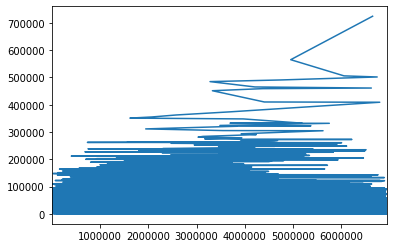

In [36]:
au_tiles.sort_values('avg_d_kbps').avg_d_kbps.plot()

In [37]:
au_tiles.sort_values('avg_d_kbps').head(25)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
6546095,3112130003103132,1,724,32,1,1,"POLYGON ((152.47925 -27.42541, 152.48474 -27.4...",POINT (152.48199 -27.42785),152.481995,-27.427852
3660285,3112130302221320,3,640,48,1,1,"POLYGON ((153.34717 -28.87354, 153.35266 -28.8...",POINT (153.34991 -28.87594),153.349915,-28.875945
4268980,3112132013323213,3,1314,1258,1,1,"POLYGON ((153.16589 -30.13088, 153.17139 -30.1...",POINT (153.16864 -30.13325),153.168640,-30.133251
2931824,3112301200231320,5,1648,48,1,1,"POLYGON ((149.21631 -33.38559, 149.22180 -33.3...",POINT (149.21906 -33.38788),149.219055,-33.387880
4140173,3130100233003032,5,4665,5,1,1,"POLYGON ((147.35962 -42.85583, 147.36511 -42.8...",POINT (147.36237 -42.85785),147.362366,-42.857846
3596172,3112231313222212,6,241,182,1,1,"POLYGON ((145.90942 -38.25975, 145.91492 -38.2...",POINT (145.91217 -38.26191),145.912170,-38.261906
3601076,3112130031302132,7,679,21,1,1,"POLYGON ((153.13843 -27.89249, 153.14392 -27.8...",POINT (153.14117 -27.89492),153.141174,-27.894922
6826591,3112132012301112,9,2438,631,1,1,"POLYGON ((152.83081 -29.99776, 152.83630 -29.9...",POINT (152.83356 -30.00014),152.833557,-30.000138
5956679,3112123303003030,11,153,31,1,1,"POLYGON ((150.87524 -31.09998, 150.88074 -31.0...",POINT (150.87799 -31.10233),150.877991,-31.102334
3601445,3103201123033030,12,1209,855,1,1,"POLYGON ((117.21313 -32.96259, 117.21863 -32.9...",POINT (117.21588 -32.96489),117.215881,-32.964891


### Subset of data - superfast (> 100 Mbps)

In [45]:
superfast = au_tiles.loc[au_tiles['avg_d_mbps'] > 100, ['avg_d_mbps', 'long', 'lat', 'tests','location']]
superfast

,avg_d_kbps,long,lat,tests,location
3329,108841,144.341125,-38.175592,57,POINT (144.34113 -38.17559)
28440,147981,149.235535,-35.368895,44,POINT (149.23553 -35.36890)
55245,107849,143.863220,-37.577236,63,POINT (143.86322 -37.57724)
71416,122392,144.379578,-38.166955,56,POINT (144.37958 -38.16695)
78782,110708,144.346619,-38.132396,61,POINT (144.34662 -38.13240)
...,...,...,...,...,...
6796193,409213,145.456238,-38.089175,2,POINT (145.45624 -38.08917)
6805469,122303,145.835266,-41.040002,1,POINT (145.83527 -41.04000)
6838311,119338,144.945374,-37.599000,1,POINT (144.94537 -37.59900)
6889909,133141,116.133728,-31.772543,1,POINT (116.13373 -31.77254)


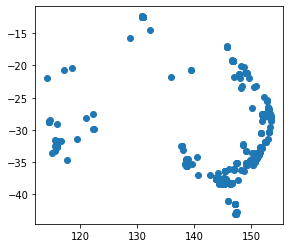

In [31]:
superfast = superfast.set_geometry('location')
superfast.plot()
# need to reset geometry property to 'Location'

In [9]:
print (datetime.now())

2020-12-14 11:16:10.992569


In [ ]:
print (datetime.now())

# Write local data to local geojson

In [8]:
#countries_gdf.to_file("countries.geojson", driver='GeoJSON')
# Write out file to geojson
melb.to_file("speedtest-MEL-Q320.geojson", driver='GeoJSON')
#working - reloaded successfully
# au2_tiles = gp.read_file("speedtest.geojson")

# TypeError: data type not understood - can't write out with Lat Long

Ferrers##### Ferrersprint (datetime.now())

In [5]:
print (datetime.now())

2020-12-14 11:28:46.438290


# Read local geojson to file

In [2]:
au_tiles = gp.read_file("speedtest-AUS-Q320.geojson")
# after export - see above
# AU subset of Speedtest data

In [3]:
au_tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry
0,3112231300310112,45620,17028,10,146,32,"POLYGON ((145.14038 -37.86184, 145.14587 -37.8..."
1,3112203030022101,28214,9913,17,7,6,"POLYGON ((138.54309 -34.99400, 138.54858 -34.9..."
2,3112301322203013,8584,1699,120,115,4,"POLYGON ((150.52917 -34.20272, 150.53467 -34.2..."
3,3112301330200121,66070,35640,11,467,149,"POLYGON ((151.19934 -33.87954, 151.20483 -33.8..."
4,3112301303332011,44056,17901,11,234,58,"POLYGON ((151.10046 -33.68778, 151.10596 -33.6..."
5,3112301321330131,41186,14554,10,203,47,"POLYGON ((151.12244 -33.95247, 151.12793 -33.9..."
6,3112231300013202,47104,17682,7,237,62,"POLYGON ((144.97559 -37.77506, 144.98108 -37.7..."
7,3112301321111231,62064,16858,10,285,75,"POLYGON ((151.14441 -33.75175, 151.14990 -33.7..."
8,3103201001121012,66411,20133,18,30,11,"POLYGON ((115.89478 -32.03136, 115.90027 -32.0..."
9,3112301330201023,38365,17191,13,29,15,"POLYGON ((151.22131 -33.88410, 151.22681 -33.8..."


### Add mbps instead of kbps

In [4]:
# To Do - load data from geojson, add Lat / Longs
# run map > 100Mbps -> post to Google, plot() - Done - Next: Google
# run map < 25 Mbps -> post to Google, plot()
# convert units to Mbps
# test geojson with Lat / Longs - ERROR

# convert to Mbps for easier reading
au_tiles['avg_d_mbps'] = au_tiles['avg_d_kbps'] / 1000
au_tiles['avg_u_mbps'] = au_tiles['avg_u_kbps'] / 1000
# Done converted to Mbps

In [5]:
au_tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112231300310112,45620,17028,10,146,32,"POLYGON ((145.14038 -37.86184, 145.14587 -37.8...",45.620,17.028
1,3112203030022101,28214,9913,17,7,6,"POLYGON ((138.54309 -34.99400, 138.54858 -34.9...",28.214,9.913
2,3112301322203013,8584,1699,120,115,4,"POLYGON ((150.52917 -34.20272, 150.53467 -34.2...",8.584,1.699
3,3112301330200121,66070,35640,11,467,149,"POLYGON ((151.19934 -33.87954, 151.20483 -33.8...",66.070,35.640
4,3112301303332011,44056,17901,11,234,58,"POLYGON ((151.10046 -33.68778, 151.10596 -33.6...",44.056,17.901
5,3112301321330131,41186,14554,10,203,47,"POLYGON ((151.12244 -33.95247, 151.12793 -33.9...",41.186,14.554
6,3112231300013202,47104,17682,7,237,62,"POLYGON ((144.97559 -37.77506, 144.98108 -37.7...",47.104,17.682
7,3112301321111231,62064,16858,10,285,75,"POLYGON ((151.14441 -33.75175, 151.14990 -33.7...",62.064,16.858
8,3103201001121012,66411,20133,18,30,11,"POLYGON ((115.89478 -32.03136, 115.90027 -32.0...",66.411,20.133
9,3112301330201023,38365,17191,13,29,15,"POLYGON ((151.22131 -33.88410, 151.22681 -33.8...",38.365,17.191


### Create arrays to weight mean, hist()

In [22]:
au_array_tests=au_tiles.tests.to_numpy()
#array.hist(bins=[0,5,10,15,20,25,30])  
au_array_tests

array([146,   7, 115, ...,   1,   2,   1])

In [23]:
au_array_dev=au_tiles.devices.to_numpy()
#array.hist(bins=[0,5,10,15,20,25,30])  
au_array_dev

array([32,  6,  4, ...,  1,  1,  1])

### Play with Superfast

In [28]:
superfast = au_tiles.loc[au_tiles['avg_d_mbps'] > 100, ['avg_d_mbps', 'avg_u_mbps','tests','devices','long', 'lat', 'location']]
superfast

,avg_d_mbps,avg_u_mbps,tests,devices,long,lat,location
93,108.841,40.700,57,12,144.341125,-38.175592,POINT (144.34113 -38.17559)
769,147.981,22.226,44,11,149.235535,-35.368895,POINT (149.23553 -35.36890)
1518,107.849,30.202,63,6,143.863220,-37.577236,POINT (143.86322 -37.57724)
1926,122.392,28.278,56,12,144.379578,-38.166955,POINT (144.37958 -38.16695)
2106,110.708,31.250,61,19,144.346619,-38.132396,POINT (144.34662 -38.13240)
...,...,...,...,...,...,...,...
87837,409.213,45.455,2,1,145.456238,-38.089175,POINT (145.45624 -38.08917)
87896,122.303,16.308,1,1,145.835266,-41.040002,POINT (145.83527 -41.04000)
88078,119.338,36.518,1,1,144.945374,-37.599000,POINT (144.94537 -37.59900)
88369,133.141,42.378,1,1,116.133728,-31.772543,POINT (116.13373 -31.77254)


In [29]:
superfast.to_csv('speedtest-AUS-superfast.csv')
# csv need converting to read back to geopandas - use geojson instead
# 689 lines

In [27]:
# superfast.to_file("speedtest-AUS-superfast.geojson", driver='GeoJSON')
# TypeError: data type not understood

In [32]:
superfast.sum()

avg_d_mbps    104400.859000
avg_u_mbps     32815.336000
tests          20314.000000
devices         4590.000000
long           99459.841003
lat           -23204.111993
dtype: float64

In [33]:
superfast.mean()

avg_d_mbps    151.525194
avg_u_mbps     47.627483
tests          29.483309
devices         6.661829
long          144.353906
lat           -33.677956
dtype: float64

In [35]:
superfast.describe()

,avg_d_mbps,avg_u_mbps,tests,devices,long,lat
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,151.525194,47.627483,29.483309,6.661829,144.353906,-33.677956
std,69.404180,54.632931,50.897527,7.000644,9.394952,5.847334
min,100.070000,3.394000,1.000000,1.000000,114.139709,-43.010673
25%,109.820000,22.938000,4.000000,2.000000,144.324646,-38.054579
50%,126.166000,28.678000,12.000000,4.000000,145.170593,-35.162582
75%,165.057000,40.487000,36.000000,9.000000,150.834045,-31.907873
max,724.326000,521.442000,605.000000,44.000000,153.481750,-12.385611


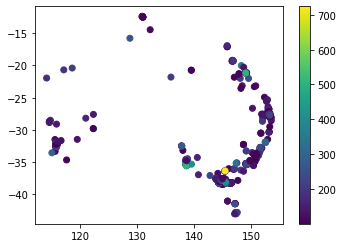

In [46]:
superfast.plot(column='avg_d_mbps', legend=True)

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


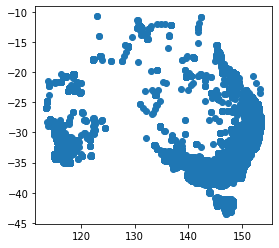

In [48]:
au_tiles.centroid.plot()
#(column='avg_d_mbps', legend = True)

## Create Melbourne data extract, plot it

In [6]:
melb = au_tiles.cx[144:146 , -39:-37]
len(melb)

16178

In [7]:
melb.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
0,3112231300310112,45620,17028,10,146,32,"POLYGON ((145.14038 -37.86184, 145.14587 -37.8...",45.620,17.028
6,3112231300013202,47104,17682,7,237,62,"POLYGON ((144.97559 -37.77506, 144.98108 -37.7...",47.104,17.682
10,3112231303003100,26455,8783,9,57,8,"POLYGON ((145.26123 -38.03079, 145.26672 -38.0...",26.455,8.783
11,3112231301002133,51102,13014,11,82,7,"POLYGON ((145.23376 -37.76637, 145.23926 -37.7...",51.102,13.014
12,3112231120233212,38315,15630,15,57,14,"POLYGON ((144.98657 -37.42689, 144.99207 -37.4...",38.315,15.630
15,3112231211113002,64842,18368,12,56,20,"POLYGON ((144.79980 -37.75769, 144.80530 -37.7...",64.842,18.368
16,3112231122233010,48133,13820,9,184,25,"POLYGON ((144.98657 -37.68382, 144.99207 -37.6...",48.133,13.820
17,3112231300122121,57466,12721,10,492,67,"POLYGON ((145.04700 -37.83148, 145.05249 -37.8...",57.466,12.721
20,3112231303121003,44710,19609,6,240,41,"POLYGON ((145.42053 -38.06972, 145.42603 -38.0...",44.710,19.609
21,3112231300211022,39943,12560,13,344,55,"POLYGON ((144.97559 -37.87052, 144.98108 -37.8...",39.943,12.560


In [17]:
print (datetime.now())

2020-12-15 13:44:30.525875


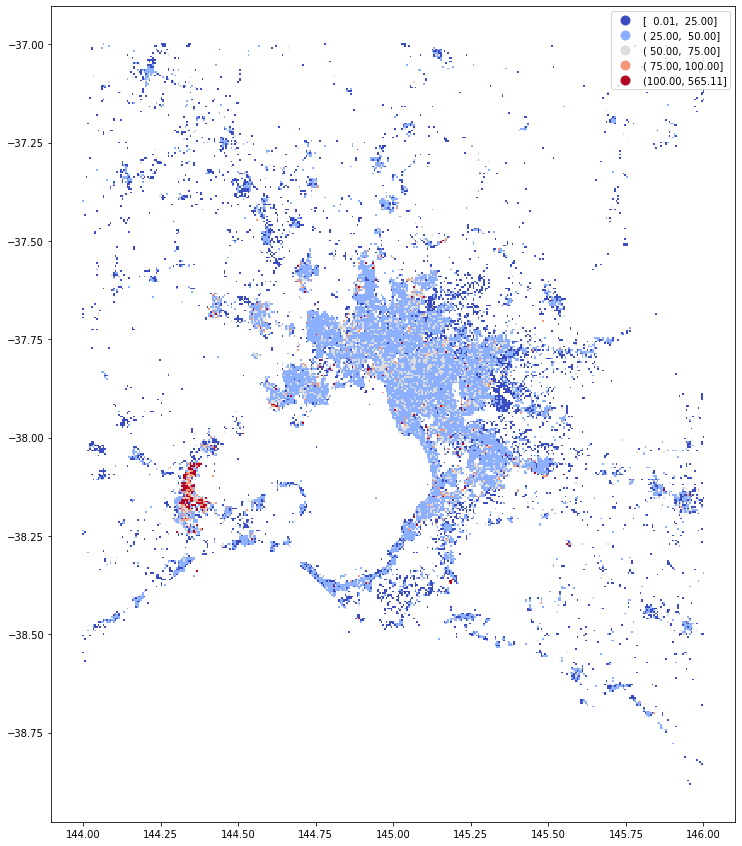

In [19]:
# conda install -c conda-forge mapclassify
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#fig, ax = plt.subplots(1, 1)

# divider = make_axes_locatable(ax)

# cax = divider.append_axes("right", size="5%", pad=0.1)

ax = melb.plot(column='avg_d_mbps',  legend = True,  cmap='coolwarm', 
               # scheme='quantiles', remove duplicate
               figsize=(15, 15), scheme="User_Defined", classification_kwds=dict(bins=[25,50,75,100]))
# plt.legend(['Download: Mbps'], fontsize='large')
# plt.show()
# cmap='coolwarm', scheme='quantiles',ax = ax, cax = cax
# world.plot(ax=ax);

In [19]:
Ferrersprint (datetime.now())

2020-12-15 13:45:07.701568


In [52]:
melb.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat,avg_d_mbps,avg_u_mbps
18,3112231300303230,40714,16790,14,129,30,"POLYGON ((145.07446 -37.91820, 145.07996 -37.9...",POINT (145.07721 -37.92037),145.077209,-37.920368,40.714,16.790
22,3112231301200330,37955,16595,72,97,23,"POLYGON ((145.22827 -37.88352, 145.23376 -37.8...",POINT (145.23102 -37.88569),145.231018,-37.885693,37.955,16.595
27,3112231301022103,36255,14050,13,142,38,"POLYGON ((145.22278 -37.82714, 145.22827 -37.8...",POINT (145.22552 -37.82931),145.225525,-37.829311,36.255,14.050
42,3112231300131121,43127,16231,14,123,27,"POLYGON ((145.17883 -37.79676, 145.18433 -37.7...",POINT (145.18158 -37.79893),145.181580,-37.798933,43.127,16.231
50,3112231300101130,47756,14157,11,106,22,"POLYGON ((145.09644 -37.72728, 145.10193 -37.7...",POINT (145.09918 -37.72945),145.099182,-37.729453,47.756,14.157
51,3112231300121322,38396,18763,16,131,40,"POLYGON ((145.08545 -37.81846, 145.09094 -37.8...",POINT (145.08820 -37.82063),145.088196,-37.820633,38.396,18.763
55,3112231300320132,44917,19349,12,79,19,"POLYGON ((145.05249 -37.93987, 145.05798 -37.9...",POINT (145.05524 -37.94203),145.055237,-37.942031,44.917,19.349
65,3112231300311232,47069,20153,12,131,32,"POLYGON ((145.16235 -37.88786, 145.16785 -37.8...",POINT (145.16510 -37.89003),145.165100,-37.890028,47.069,20.153
66,3112231300312000,43287,16680,10,199,26,"POLYGON ((145.10742 -37.89220, 145.11292 -37.8...",POINT (145.11017 -37.89436),145.110168,-37.894363,43.287,16.680
69,3112231300131311,37686,13010,11,72,15,"POLYGON ((145.18982 -37.80544, 145.19531 -37.8...",POINT (145.19257 -37.80761),145.192566,-37.807614,37.686,13.010


### World data to get AUS outline

In [44]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

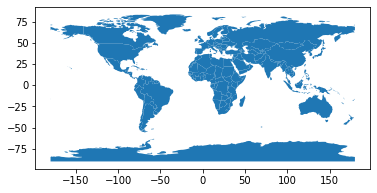

In [45]:
world.plot()

### WA data - Western 1/2 of AUS

In [44]:
wa = au_tiles.cx[:135 , :]
len(melb)

16508

In [70]:
# import contextily as ctx
# ModuleNotFoundError: No module named 'contextily'

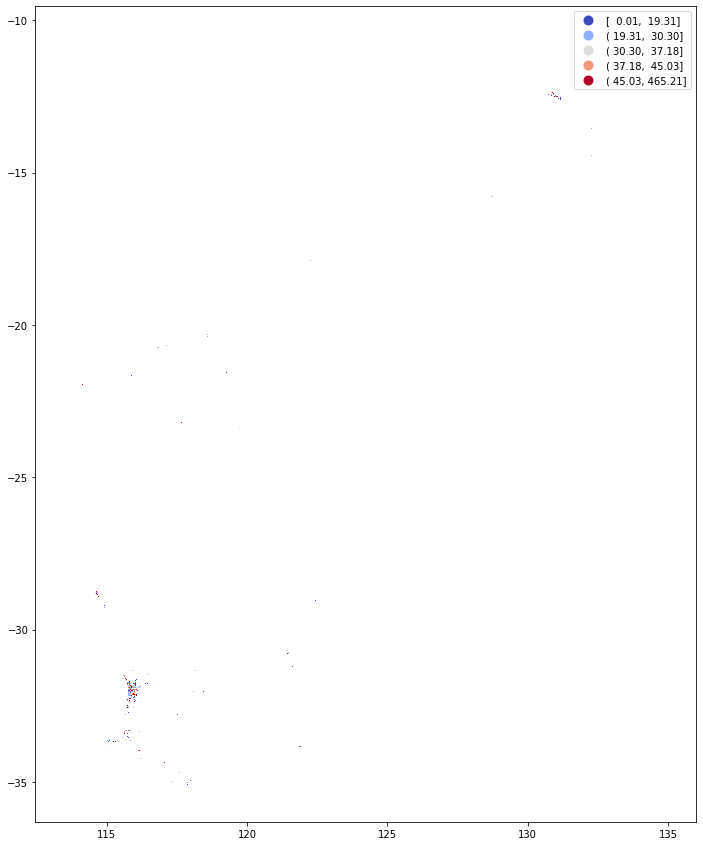

In [71]:
# pip install geoplot
# import geoplot as gplt
# ModuleNotFoundError: No module named 'geoplot'

#ax = gplt.webmap(boroughs, projection=gcrs.WebMercator())
# import contextily as ctx
# ax = df.plot(figsize=(15, 15), alpha=0.5, edgecolor='k')
# ctx.add_basemap(ax)
# ModuleNotFoundError: No module named 'contextily'

wa.plot(column='avg_d_mbps',  legend = True,  cmap='coolwarm', scheme='quantiles', figsize=(15, 15))
# WA is a lot of open space.
#  ax=ax,

In [46]:
wa.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
7,3103023223323312,36295,17877,6,146,25,"POLYGON ((115.91675 -31.93818, 115.92224 -31.9...",36.295,17.877
19,3103023223230322,39206,19420,12,269,31,"POLYGON ((115.77393 -31.91020, 115.77942 -31.9...",39.206,19.420
20,3103201010000303,36245,17027,7,12,4,"POLYGON ((116.04309 -31.97546, 116.04858 -31.9...",36.245,17.027
24,3103023223233112,35758,20629,13,203,43,"POLYGON ((115.82886 -31.91953, 115.83435 -31.9...",35.758,20.629
26,3101310122203030,39547,14615,68,26,15,"POLYGON ((130.83618 -12.43658, 130.84167 -12.4...",39.547,14.615
38,3103020310002103,11139,966,27,4,1,"POLYGON ((114.63684 -28.34790, 114.64233 -28.3...",11.139,0.966
46,3103201001013001,50875,12595,29,67,9,"POLYGON ((115.80139 -31.98944, 115.80688 -31.9...",50.875,12.595
56,3103201003013301,34429,19897,45,50,10,"POLYGON ((115.82336 -32.30571, 115.82886 -32.3...",34.429,19.897
59,3103023223133100,44639,18075,9,26,8,"POLYGON ((115.99365 -31.76554, 115.99915 -31.7...",44.639,18.075
80,3103201001333030,37968,3159,7,40,11,"POLYGON ((115.98267 -32.22210, 115.98816 -32.2...",37.968,3.159


In [50]:
print (datetime.now())

2020-12-15 15:12:09.486658


## AUS colour plot

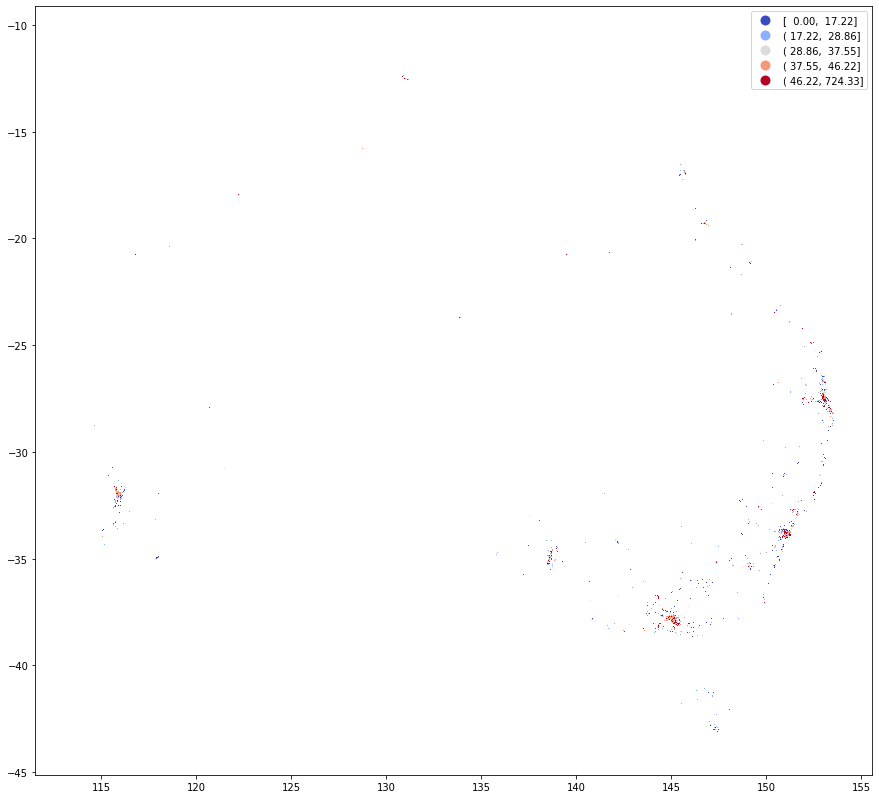

In [55]:
au_tiles.plot(column='avg_d_mbps',  legend = True,  cmap='coolwarm', scheme='quantiles', figsize=(15,15))
# AUS is a lot of open space.

In [52]:
print (datetime.now())

2020-12-15 15:13:01.973906


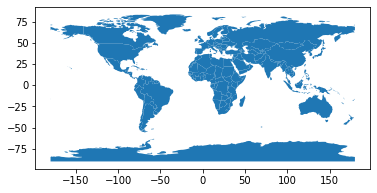

In [46]:
world.plot()

In [47]:
au_world = world.cx[113.338953:153.569469 ,	-43.634597:-10.668186]

In [1]:
au_world.plot()

NameError: name 'au_world' is not defined

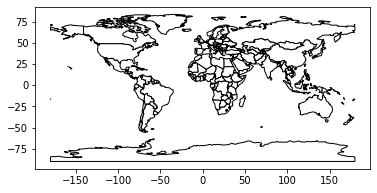

In [75]:
world.plot(color='white', edgecolor='black')


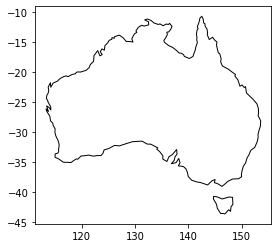

In [76]:
au_world.plot(color='white', edgecolor='black')

In [82]:
base = au_world.plot(color='white', edgecolor='black', figsize=(150,150))
# cities.plot(ax=base, marker='o', color='red', markersize=5);
au_tiles.plot(ax=base, column='avg_d_mbps',  legend = True,  cmap='coolwarm', scheme='quantiles', figsize=(150, 150))

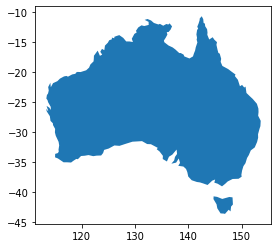

In [84]:
melb_world = au_world.cx[144:146 , -39:-37]
melb_world.plot()

In [85]:
melb_world.head(10)
# no subset for Melb possible - CX not slicing up AUS

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


In [87]:
au_world.head(10)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."


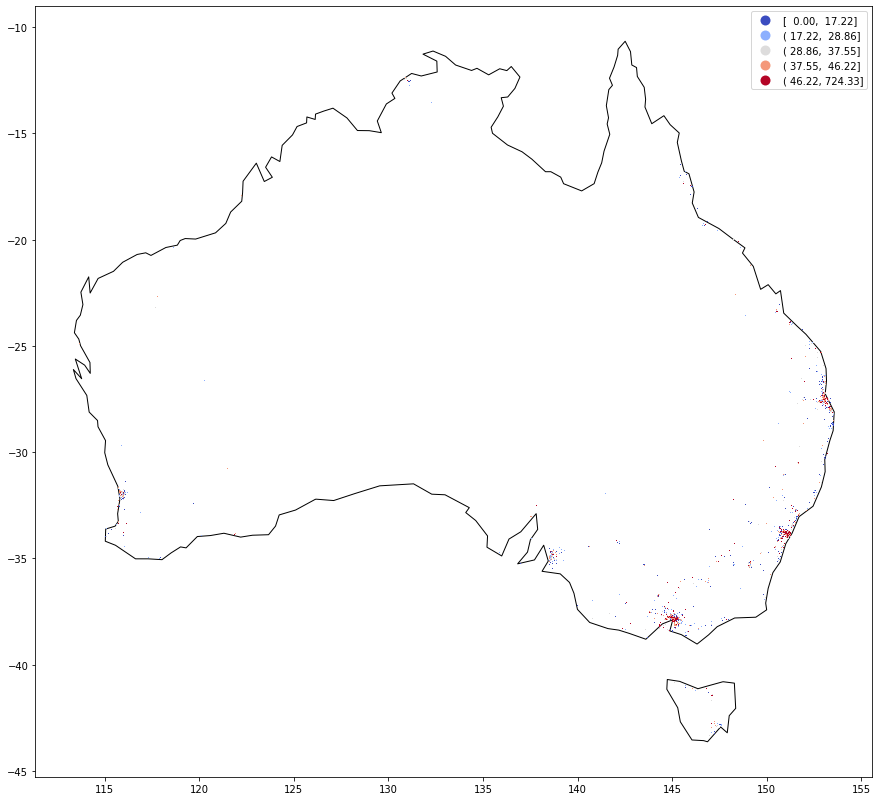

In [88]:
base = au_world.plot(color='white', edgecolor='black', figsize=(15,15))
# cities.plot(ax=base, marker='o', color='red', markersize=5);
au_tiles.plot(ax=base, column='avg_d_mbps',  legend = True,  cmap='coolwarm', scheme='quantiles', figsize=(15, 15))

In [ ]:
# https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630
# set the value column that will be visualised
variable = 'cities_regencies'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [ ]:
# https://stackoverflow.com/questions/56690524/matplotlib-geopandas-plot-chloropleth-with-set-bins-for-colorscheme/56695238#56695238
gdf.plot(column='quant', cmap='RdBu', scheme="User_Defined", 
         legend=True, classification_kwds=dict(bins=[-10,20,30,50,70]),
         ax=ax)
#user defined bins

In [49]:

variable = 'avg_d_mbps'
vmin, vmax = 25, 100
fig, ax = plt.subplots(1, figsize=(150, 150))
#ax.axis('off')
ax.set_title('Broadband Download Speed - Speedtest - Q2 2020', fontdict={'fontsize': '250', 'fontweight' : '30'})
ax.annotate('Source: Ookla Open Data - opendata.aws', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
# fig.colorbar(sm) - remove large legend

base = au_world.plot(ax = ax, color='white', edgecolor='black', figsize=(150,150))
# cities.plot(ax=base, marker='o', color='red', markersize=5);
au_tiles.plot(ax=base, column=variable, 
              # legend = True, #remove duplicate legend
              cmap='coolwarm',  figsize=(150, 150), scheme="User_Defined", classification_kwds=dict(bins=[25,50,75,100]))
# remove scheme='quantiles'
# NB: whole AUS dataset from 0 - 756 Mbps; want to classify to: 0-25, 25-50, 50-75, 75-100, >100. Done.
# Need to add back in Titles (Done) and Big Legend (toDo).

In [20]:
# create bins for au_tiles
# 0-25, 25-50, 50-75, 75-100, >100
# was missing scheme="User_Defined"
melb.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,avg_d_mbps,avg_u_mbps
3,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9...",32.255,2.015
6,3112231312213112,2620,4037,627,1,1,"POLYGON ((145.71167 -38.17343, 145.71716 -38.1...",2.620,4.037
10,3112231211112313,44616,19758,15,31,9,"POLYGON ((144.79431 -37.77506, 144.79980 -37.7...",44.616,19.758
15,3112231300211002,54182,13231,23,595,85,"POLYGON ((144.97559 -37.86184, 144.98108 -37.8...",54.182,13.231
18,3112231300303230,40714,16790,14,129,30,"POLYGON ((145.07446 -37.91820, 145.07996 -37.9...",40.714,16.790
22,3112231301200330,37955,16595,72,97,23,"POLYGON ((145.22827 -37.88352, 145.23376 -37.8...",37.955,16.595
27,3112231301022103,36255,14050,13,142,38,"POLYGON ((145.22278 -37.82714, 145.22827 -37.8...",36.255,14.050
42,3112231300131121,43127,16231,14,123,27,"POLYGON ((145.17883 -37.79676, 145.18433 -37.7...",43.127,16.231
48,3112231300001211,44166,17628,7,115,42,"POLYGON ((144.90417 -37.73597, 144.90967 -37.7...",44.166,17.628
50,3112231300101130,47756,14157,11,106,22,"POLYGON ((145.09644 -37.72728, 145.10193 -37.7...",47.756,14.157


### Histograms

In [125]:
count_melb = melb[["quadkey", "avg_d_mbps", "tests"]]
count_melb

,quadkey,avg_d_mbps,tests
3,3112231211312303,0.005,129
6,3112231312213112,0.007,1
10,3112231211112313,0.012,31
15,3112231300211002,0.021,595
18,3112231300303230,0.025,129
...,...,...,...
88604,3112231303123230,254.860,1
88615,3112231123012100,271.821,1
88618,3112231130212031,273.389,1
88623,3112231313010023,284.033,1


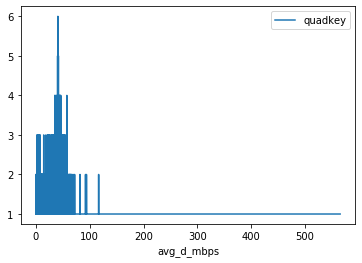

In [25]:
count_melb.groupby('avg_d_mbps').count().plot()
# https://data36.com/plot-histogram-python-pandas/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8168f0b550>,
      dtype=object)

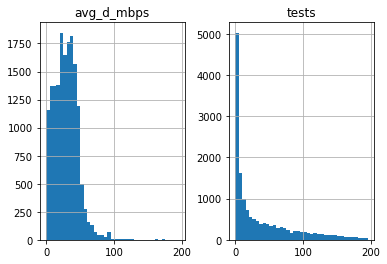

In [126]:
count_melb.hist(bins=np.arange(0,200,5))


In [29]:
count_aus = au_tiles[["quadkey", "avg_d_mbps"]]
# ["quadkey", "avg_d_mbps", "tests"] - means two hist graphs - one for each column
count_aus

,quadkey,avg_d_mbps
26,3112231300310112,45.620
140,3112203030022101,28.214
143,3112301322203013,8.584
176,3112301330200121,66.070
213,3112301303332011,44.056
...,...,...
6869412,3112320210031222,14.658
6869488,3112203010103000,14.049
6869685,3112132230133301,16.250
6869874,3112301303110202,22.966


(0, 152.25)

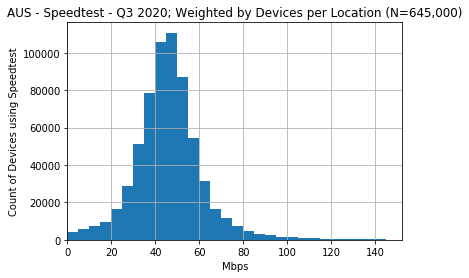

In [31]:
#  https://stackoverflow.com/questions/51473993/plot-an-histogram-with-y-axis-as-percentage-using-funcformatter
from matplotlib.ticker import PercentFormatter
#weights = count_aus.tests
count_aus.hist(bins=np.arange(0,150,5), 
               weights = au_array_dev)
               #np.ones(len(count_aus)) / len(count_aus))
               # .set_ylim(ymax = 15)
# numpy.hist - https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("AUS - Speedtest - Q3 2020; Weighted by Devices per Location (N=645,000)")
plt.xlabel("Mbps")
plt.ylabel("Count of Devices using Speedtest")
plt.xlim(left=0)

#761,000 devices - weight = au_array_dev
# only 5% below 20Mbps
#88,000 locations - 25% below 20Mbps
#3e06 tests - weight = au_array_tests
# only 5% below 20Mbps 

# plt.ylim(top=15)
#ax = count_aus.plot()
#ax.set_ylim(ymax = 15)
#plt.set_ylim(ymax = 15)
#ax.set_title('matplotlib.axes.Axes.hist() Example') 
#plt.show()
# set y-axis to 5% intervals - 0- 20%
# set x-axis to 50Mbps intervals - 0, 50, 100, 150
# add weighting to hist(), in proportion to n|umber of tests (no) (or users - yes)

# download Q3 2020 and replot Hist on same graph. Should see graph moving to the right, as new 250, 1000 plans come online.
# plus more people coming on to NBN. About 23,000  brownfields per week.

<img src="https://pbs.twimg.com/media/D-_bAVXUIAYYBjK.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

<h2>Compare Hist - Q2, Q3</h2><img src="histogram-devices-AUS-Q3-2020.png"><br>
<img src="histogram-devices-AUS-Q2-2020.png">

(0, 152.25)

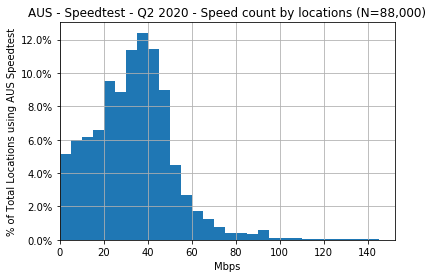

In [57]:
from matplotlib.ticker import PercentFormatter
#weights = count_aus.tests
count_aus.hist(bins=np.arange(0,150,5), 
               weights = np.ones(len(count_aus)) / len(count_aus))
               # .set_ylim(ymax = 15)
# numpy.hist - https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("AUS - Speedtest - Q2 2020 - Speed count by locations (N=88,000)")
plt.xlabel("Mbps")
plt.ylabel("% of Total Locations using AUS Speedtest")
plt.xlim(left=0)



In [17]:
# count_aus.tests.hist()
# - excluded test to avoid double hist diagram

In [18]:
# count_aus.tests
# can weight histogram by number of tests at each speed

In [19]:
# cumulative = np.cumsum(count_aus.tests)
#plt.plot(base[:-1], cumulative, c='blue')Ferrers
# cumulative
# - to plot cumulative graph ie 0 - 100% s curve.

In [46]:
Ferrers = 1E07
Ferrers

10000000.0

## Create Slow Users extract

In [75]:
superslow = au_tiles.loc[au_tiles['avg_d_mbps'] < 10, ['avg_d_mbps', 'long', 'lat', 'tests','devices','location']]
superslow

,avg_d_mbps,long,lat,tests,devices,location
6,2.620,145.714417,-38.175592,1,1,POINT (145.71442 -38.17559)
52,7.975,138.578796,-34.712267,3,1,POINT (138.57880 -34.71227)
76,8.369,146.335144,-41.275742,47,1,POINT (146.33514 -41.27574)
138,9.478,150.965881,-33.282324,1,1,POINT (150.96588 -33.28232)
238,7.348,144.214783,-36.754290,14,2,POINT (144.21478 -36.75429)
...,...,...,...,...,...,...
88623,5.198,145.994568,-38.011312,1,1,POINT (145.99457 -38.01131)
88632,1.031,144.379578,-37.381070,1,1,POINT (144.37958 -37.38107)
88635,8.172,137.914124,-34.427302,1,1,POINT (137.91412 -34.42730)
88640,1.300,153.185120,-28.118016,1,1,POINT (153.18512 -28.11802)


In [83]:
#superslow.plot()

In [77]:
superslow.to_csv('superslow-speedtest-AUS-2020-04-01')

In [78]:
superslow.describe()

,avg_d_mbps,long,lat,tests,devices
count,9871.000000,9871.000000,9871.000000,9871.000000,9871.000000
mean,5.271478,145.453652,-32.946689,4.314153,1.368858
std,2.777697,9.763721,5.303313,9.781321,0.969337
min,0.001000,113.529968,-43.415024,1.000000,1.000000
25%,2.962000,144.555359,-37.142803,1.000000,1.000000
50%,5.335000,148.131409,-33.804256,2.000000,1.000000
75%,7.603500,151.350403,-28.861513,4.000000,1.000000
max,9.999000,153.564148,-10.895345,255.000000,20.000000


In [80]:
superslow.sum()
#13,000 devices
#42,500 tests
#10,000 locations

avg_d_mbps    5.203476e+04
long          1.435773e+06
lat          -3.252168e+05
tests         4.258500e+04
devices       1.351200e+04
dtype: float64

In [81]:
ultraslow = au_tiles.loc[au_tiles['avg_d_mbps'] < 1, ['avg_d_mbps', 'long', 'lat', 'tests','devices','location']]
ultraslow

,avg_d_mbps,long,lat,tests,devices,location
879,0.917,144.533386,-37.376705,5,1,POINT (144.53339 -37.37671)
2868,0.221,146.263733,-20.063671,1,1,POINT (146.26373 -20.06367)
13187,0.812,143.896179,-38.631891,4,2,POINT (143.89618 -38.63189)
14052,0.233,152.992859,-27.841505,1,1,POINT (152.99286 -27.84150)
15120,0.096,137.540588,-33.061622,1,1,POINT (137.54059 -33.06162)
...,...,...,...,...,...,...
88368,0.136,152.295227,-27.982275,1,1,POINT (152.29523 -27.98227)
88401,0.852,117.721252,-31.627660,1,1,POINT (117.72125 -31.62766)
88557,0.315,131.130066,-12.578691,1,1,POINT (131.13007 -12.57869)
88574,0.938,147.021790,-41.188989,1,1,POINT (147.02179 -41.18899)


In [82]:
ultraslow.to_csv('ultraslow-speedtest-AUS-2020-04-01')

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Speedtest - Ultra (&lt;1Mbps; black) / SuperSlow (&lt;10Mbps; red) - Location Average - Q2 2020 - as Google Map - Ultraslow 1% of total locations; Superslow about 10% of locations - <a href="https://t.co/E7R7QcEwIa">https://t.co/E7R7QcEwIa</a></p>&mdash; Richard Ferrers (@ValueMgmt) <a href="https://twitter.com/ValueMgmt/status/1339078807282577409?ref_src=twsrc%5Etfw">December 16, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

### Change Means to weighted mean

In [7]:
# Weighted Mean
import numpy as np
np.average([1, 2, 3], weights=[0.4, 0.2, 0.2])

1.75

In [6]:
np.average([1, 2, 3])

2.0

In [24]:
au_tiles.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,avg_d_mbps,avg_u_mbps
count,83782.000000,83782.000000,83782.000000,83782.000000,83782.000000,83782.000000,83782.000000
mean,37759.239121,13217.912177,40.833294,29.593887,7.704626,37.759239,13.217912
std,24934.302996,11225.860226,110.024406,79.294021,12.203111,24.934303,11.225860
min,2.000000,1.000000,1.000000,1.000000,1.000000,0.002000,0.001000
25%,22968.000000,4876.000000,10.000000,2.000000,1.000000,22.968000,4.876000
50%,36824.500000,13545.000000,15.000000,7.000000,3.000000,36.824500,13.545000
75%,48145.750000,18091.000000,29.000000,31.000000,10.000000,48.145750,18.091000
max,722365.000000,399237.000000,4065.000000,11584.000000,475.000000,722.365000,399.237000


In [25]:
np.average(au_tiles.avg_d_mbps)

37.75923912057482

In [26]:
np.average(au_tiles.avg_d_mbps, weights=au_array_dev)
#au_array_dev

46.51479648153628

In [27]:
np.average(au_tiles.avg_d_mbps, weights=au_array_tests)

47.50546737502696

### Create Hist() weighted by Tests
Load geojson.
Add Mbps.
Create array of tests - to use (au_array_test)
Create extract of Au_tiles with data for Hist() - count_aus
Copy Hist() code


In [28]:
from matplotlib.ticker import PercentFormatter
#weights = count_aus.tests
count_aus.hist(bins=np.arange(0,150,5), 
               weights =  au_array_tests / sum_tests)
               #np.ones(len(count_aus)) / len(count_aus) * au_array_tests ) #??? Numbers are too small/big.
               # .set_ylim(ymax = 15)
# numpy.hist - https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("AUS - Speedtest - Q2 2020; Weighted by Count of Tests per Location (N=3.1M)")
plt.xlabel("Mbps")
plt.ylabel("Percent of samples on Speedtest")
plt.xlim(left=0)
# graph totals add to about 35-40
# but if remove Au_array_tests, then get hist() of locations (N=88,000)
# 15% over 60Mbps or less than 20Mbps

NameError: name 'count_aus' is not defined

In [55]:
pc_weight = np.ones(len(count_aus))/ len(count_aus) # * au_array_tests)
sum(pc_weight)

1.0000000000017704

In [20]:
sum_tests = au_tiles.tests.sum()
sum_tests

3073738

In [57]:
test_weight  = au_array_tests / sum_tests
sum(test_weight)
# how to weight the % array with test array.
# So the area under the histogram is 100%.

1.0000000000010087

In [48]:
sum(au_array_tests)

3073738

In [2]:
weight = pc_weight * test_weight
weight.sum()
# SUM OF WEIGHT = 88654, not 1 as wanted.

NameError: name 'pc_weight' is not defined

In [34]:
#pickup - how to get hist() of tests to sum to 1 (area under the graph)
# seems fixed now.
#pickup plot histograms on same axes

In [ ]:
# create table
# - ID, Q2, Q3 speed (no weighting)
# thereafter try to weight by devices or tests

### Extract 2 degree grid - BKK, SHG

In [139]:
bkk = tiles.cx[100:102 , 13:15]
len(bkk)
#bangkok = BKK 13,100
#shanghai = SHG 30, 120
# LOCN.to_file("speedtest-LOC-Q320.geojson", driver='GeoJSON')

29292

In [141]:
shg = tiles.cx[120:122 , 30:32]
len(shg)

31741

In [142]:
bkk.to_file("speedtest-BKK-Q320.geojson", driver='GeoJSON')

In [143]:
shg.to_file("speedtest-SHG-Q320.geojson", driver='GeoJSON')